# Advanced Linear and Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("1000_Companies.csv")
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
R&D Spend          1000 non-null float64
Administration     1000 non-null float64
Marketing Spend    1000 non-null float64
State              1000 non-null object
Profit             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.1+ KB


In [4]:
y=df.iloc[:,-1]
print(y.tail())
print("y shape ->",y.shape)
print("y dimension ->",y.ndim)

995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, dtype: float64
y shape -> (1000,)
y dimension -> 1


### Extracting only the values for the target vector

In [5]:
y=df.iloc[:,-1].values
print(y[0:10])
print("y shape ->",y.shape)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96]
y shape -> (1000,)


## Extract the Feature matrix

In [6]:
X=df.iloc[:,:-1]
X1=X.copy()
X.tail()

,R&D Spend,Administration,Marketing Spend,State
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California
999,161181.72,270939.860,295442.1700,New York


## Convert the string in the column to numbers

* LabelEncoder and OneHotEncoder
* GetDummies

In [7]:
X["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [9]:
le=LabelEncoder()

In [10]:
le.fit_transform(X.iloc[:,3])

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1,

In [11]:
X.iloc[:,3]=le.fit_transform(X.iloc[:,3])
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [12]:
onehotencoder=OneHotEncoder(categorical_features=[3])

In [13]:
X=pd.DataFrame(onehotencoder.fit_transform(X).toarray())
X.head()

D:\bharath\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\bharath\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


## Dummy variable Trap

In [14]:
X=X.iloc[:,1:]
X.head()

,1,2,3,4,5
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


## GetDummies method using Pandas

In [15]:
X1.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [16]:
pd.get_dummies(X1.State)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [17]:
state=pd.get_dummies(X1.State,drop_first=True)
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [18]:
X2=pd.concat([X1,state],sort=False,axis=1)
X2.head()

,R&D Spend,Administration,Marketing Spend,State,Florida,New York
0,165349.20,136897.80,471784.10,New York,0,1
1,162597.70,151377.59,443898.53,California,0,0
2,153441.51,101145.55,407934.54,Florida,1,0
3,144372.41,118671.85,383199.62,New York,0,1
4,142107.34,91391.77,366168.42,Florida,1,0


In [19]:
X3=X2.drop(["State"],axis=1)
X3.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


## Machine Learning

In [20]:
from sklearn.model_selection import train_test_split
#Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
Xtrain,Xtest,ytrain,ytest=train_test_split(X3,y,test_size=0.2)
print("Xtrain ",Xtrain.shape)
print("Xtest ",Xtest.shape)
print("ytrain ",ytrain.shape)
print("ytest ",ytest.shape)

Xtrain  (800, 5)
Xtest  (200, 5)
ytrain  (800,)
ytest  (200,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
ypred=model.predict(Xtest)
ypred

array([173075.59514381,  97924.34369577,  70950.85386803, 168634.87251783,
       126295.52908701, 103256.42212734,  51352.15421004, 123998.7458005 ,
        61719.59170002,  69438.36866956,  90237.91604889, 169578.44413773,
       183506.21143747, 109819.38126574, 166282.35911301,  82348.0140893 ,
        60618.58237441, 130538.69975317, 167985.61181678, 121311.62273902,
       154607.08245815, 118967.75611894, 156348.79781548, 110179.52966494,
       106386.42277848,  50543.74509788,  65947.27189128,  72762.59174095,
       144526.9767425 ,  84138.5827282 ,  88719.4756195 , 171123.31165724,
        97093.69264212, 101835.50401811, 169982.98430796,  61396.10288505,
       137164.26571409, 152570.20069499,  88997.49994465,  66919.04080567,
       185666.24638045,  92833.50489047,  60189.1418215 , 159471.09941853,
        94977.25310721, 117107.16497315, 142013.73979151, 174498.95444502,
       127037.30448142, 158560.89059312, 156472.83947543, 138613.0215254 ,
       163314.80354497, 1

In [25]:
print("Coefficient ",model.coef_)
print("Intercept ",model.intercept_)

Coefficient  [ 5.04697702e-01  1.23828232e+00  8.70102465e-02 -4.65462026e+02
 -1.26574969e+02]
Intercept  -93190.37029991651


In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypred)

2357.368833769173

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred)

82911784.9035753

In [28]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest,ypred))

9105.59085966283

In [29]:
from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.9557492354258714

## Visualization

In [30]:
pd.DataFrame({"Actual value":ytest,"Predicted value":ypred,"Absolute Difference":np.abs(ytest-ypred)})

,Actual value,Predicted value,Absolute Difference
0,172495.08810,173075.595144,580.507044
1,97446.44542,97924.343696,477.898276
2,70509.78421,70950.853868,441.069658
3,167934.02640,168634.872518,700.846118
4,126117.31810,126295.529087,178.210987
5,102771.24350,103256.422127,485.178627
6,51276.26828,51352.154210,75.885930
7,123485.24640,123998.745801,513.499401
8,61291.12602,61719.591700,428.465680
9,68872.96194,69438.368670,565.406730


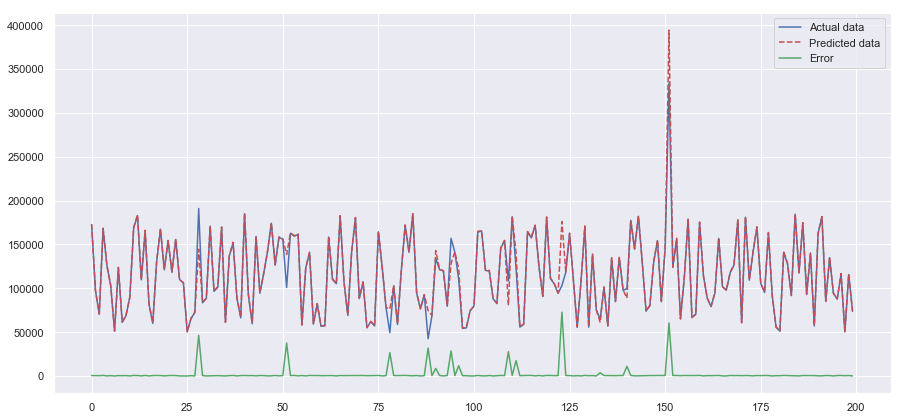

In [31]:
sns.set()
plt.figure(figsize=(15,7))
plt.plot(np.arange(len(ytest)),ytest,label="Actual data")
plt.plot(np.arange(len(ypred)),ypred,"r--",label="Predicted data")
plt.plot(np.arange(len(np.abs(ytest-ypred))),np.abs(ytest-ypred),"g",label="Error")
plt.legend()
plt.show()

## Covid Growth Prediction

In [2]:
covid=pd.read_csv("covid_india.csv")
covid.tail()

,Date,Days,Cases
52,22-03-2020,53,391
53,23-03-2020,54,468
54,24-03-2020,55,519
55,25-03-2020,56,606
56,26-03-2020,57,646


In [3]:
covid1=covid[["Days","Cases"]].copy()
covid1.head()

,Days,Cases
0,1,1
1,2,1
2,3,1
3,4,2
4,5,3


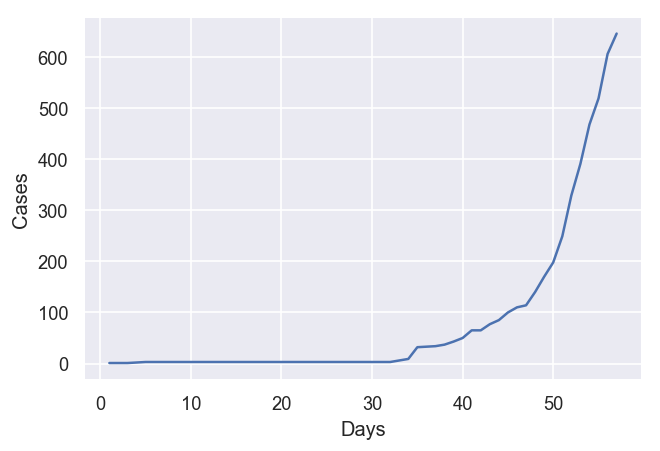

In [4]:
sns.set()
plt.figure(dpi=120)
sns.lineplot(x="Days",y="Cases",data=covid1)
plt.show()

In [5]:
covid1.head(35)

,Days,Cases
0,1,1
1,2,1
2,3,1
3,4,2
4,5,3
5,6,3
6,7,3
7,8,3
8,9,3
9,10,3


In [6]:
covid2=covid1.iloc[29:,:].copy()
covid2

,Days,Cases
29,30,3
30,31,3
31,32,3
32,33,6
33,34,9
34,35,32
35,36,33
36,37,34
37,38,37
38,39,43


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x=covid2["Days"]
X=x[:,np.newaxis]
y=covid2["Cases"]
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (28, 1)
Shape of y (28,)


In [8]:
poly=PolynomialFeatures(degree=3)
poly_X=poly.fit_transform(X)
print(poly_X.shape)
print(poly_X[:10])

(28, 4)
[[1.0000e+00 3.0000e+01 9.0000e+02 2.7000e+04]
 [1.0000e+00 3.1000e+01 9.6100e+02 2.9791e+04]
 [1.0000e+00 3.2000e+01 1.0240e+03 3.2768e+04]
 [1.0000e+00 3.3000e+01 1.0890e+03 3.5937e+04]
 [1.0000e+00 3.4000e+01 1.1560e+03 3.9304e+04]
 [1.0000e+00 3.5000e+01 1.2250e+03 4.2875e+04]
 [1.0000e+00 3.6000e+01 1.2960e+03 4.6656e+04]
 [1.0000e+00 3.7000e+01 1.3690e+03 5.0653e+04]
 [1.0000e+00 3.8000e+01 1.4440e+03 5.4872e+04]
 [1.0000e+00 3.9000e+01 1.5210e+03 5.9319e+04]]


In [9]:
model=LinearRegression()
model.fit(poly_X,y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
xnew=np.arange(30,71)
Xnew=xnew[:,np.newaxis]
poly=PolynomialFeatures(degree=3)
poly_out_new=poly.fit_transform(Xnew)
y_pred=model.predict(poly_out_new)

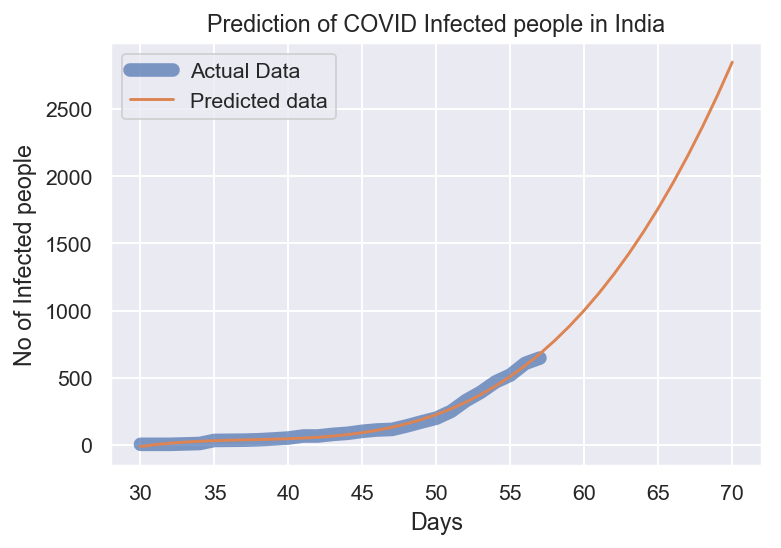

In [11]:
plt.figure(dpi=140)
plt.plot(covid2["Days"],covid2["Cases"],lw=7,alpha=0.7,label="Actual Data")
plt.plot(xnew,y_pred,label="Predicted data")
plt.legend(loc="best")
plt.title("Prediction of COVID Infected people in India")
plt.xlabel("Days")
plt.ylabel("No of Infected people")
plt.show()

In [16]:
pd.DataFrame({"Days":xnew,"Predicted cases":y_pred})

,Days,Predicted cases
0,30,-13.460671
1,31,0.398697
2,32,11.207281
3,33,19.439681
4,34,25.570496
5,35,30.074326
6,36,33.425771
7,37,36.099429
8,38,38.569901
9,39,41.311786


In [14]:
print("Accuracy of my Model :",model.score(poly_X,y)*100)

Accuracy of my Model : 99.37886481952457


# Questions?